# Business Problem: 

The goal is to build a CNN model that can accurately categorize images of clothing based on type of clothing such as dress, shirt, pants, top, etc. Ideally, an accuracy of at least 90% is optimal for this model.

## Layout: 

The basic 7 steps for building models in general are listed:

1. Load Dataset
2. Make Dataset Iterable
3. Create Model Class
4. Instantiate Model Class
5. Instantiate Loss Class
6. Instantiate Optimizer Class
7. Train Model

### Import Libraries

In [1]:
# Pyton 2 and 3 support
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sklearn

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
#from vis_utils import *
import random;
import math;

## Load Data

In [3]:
all_df = pd.read_table('list_eval_partition.txt', delim_whitespace=True)
all_df

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,train


In [4]:
validation_df = all_df[all_df['evaluation_status'].str.contains('val')]
all_df = pd.read_table('list_eval_partition.txt', delim_whitespace=True)
validation_df = all_df[all_df['evaluation_status'].str.contains('val')]
validation_df = validation_df.drop(['evaluation_status'], axis=1)[0:100]

train_df = all_df[all_df['evaluation_status'].str.contains('train')]
train_df = train_df.drop(['evaluation_status'], axis=1)[0:100]

test_df = all_df[all_df['evaluation_status'].str.contains('test')]
test_df = test_df.drop(['evaluation_status'], axis=1)[0:100]

labels_df = pd.read_table('list_category_img.txt', delim_whitespace=True)
labels_df

def func(imagee): 
    category_label = labels_df[labels_df['image_name'].str.match(imagee)].iloc[0]['category_label']
    return category_label

In [23]:
allimagesvalidation = []
labelvalidation = []
for index in range(100):
    img_filepath = validation_df.iloc[index]['image_name']
    im = Image.open(img_filepath)
    labelvalidation.append(func(img_filepath))
    imarr = np.uint8(np.asarray(im.convert('RGB').resize((224,224))))
    imarr = (imarr - imarr.mean()) / imarr.std() # normalizes data
    allimagesvalidation.append(imarr)

allimagestrain = []
labeltrain = []
for index in range(100):
    img_filepath = train_df.iloc[index]['image_name']
    im = Image.open(img_filepath) # loads a JPEG image into Python 
    labeltrain.append(func(img_filepath))
    imarr = np.uint8(np.asarray(im.convert('RGB').resize((224,224))))
    imarr = (imarr - imarr.mean()) / imarr.std() # normalizes data
    allimagestrain.append(imarr)

allimagestest = []
labeltest = []
for index in range(100):
    img_filepath = test_df.iloc[index]['image_name']
    im = Image.open(img_filepath)
    labeltest.append(func(img_filepath))
    imarr = np.uint8(np.asarray(im.convert('RGB').resize((224,224))))
    imarr = (imarr - imarr.mean()) / imarr.std() # normalizes data
    allimagestest.append(imarr)

### Build Dataset Class

In [6]:
class ClothingDataset(Dataset):
    def __init__(self, data, labels): 
        self.labels = labels
        self.data = data
        
    def __getitem__(self, index):
        img = self.data[index]
        
        trans = transforms.ToTensor()
        img = trans(img)
        
        label = self.labels[index]
        label = torch.LongTensor(label)
        
        return img, label

    def __len__(self):
        return len(self.labels)

## Make Dataset Iterable

In [7]:
batch_size = 10

train_dataset = ClothingDataset(allimagestrain, labeltrain)
validation_dataset = ClothingDataset(allimagesvalidation, labelvalidation) 
test_dataset = ClothingDataset(allimagestest, labeltest)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,                                             
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                          shuffle=False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                          batch_size=batch_size,
                                          shuffle=False)


## Build Model Class 

In [8]:
class ConvolutionalNeuralNetModel(nn.Module):
    def __init__(self, output_dim):
        super(ConvolutionalNeuralNetModel, self).__init__()
        # first number is depth (3 layers in pixels cuz rgb) and second is output dimensions
        self.conv1 = nn.Conv2d(3, 16, kernel_size=4, stride=2, padding=2, bias=False) # change 
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.fc = nn.Linear(51984, output_dim)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

## Instantiate Model Class

In [9]:
input_dim = 28 * 28 
hidden_dim = 100
output_dim = 50 # represents number of labels you're trying to train on 

# model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model = ConvolutionalNeuralNetModel(output_dim)

## Instantiate Loss Class

In [10]:
criterion = nn.CrossEntropyLoss()

## Instantiate Optimizer Class

In [11]:
learning_rate = .1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train Model

In [39]:
iter = 0
losses = []
accuracies = []
for epoch in range(1):
    for i, (images, labels) in enumerate(train_loader):
    #for images, labels in train_loader:
        # Load images with gradient accumulation capabilities
        # images = images.view(-1, 28*28).requires_grad_()
        # images = images.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # changes the way the label shapes are represented; 
        # basically converting [0, 0, 1, ..., 0, 0, 0] -> 2
        # and [0, 1, 0, ..., 0, 0, 0] -> 1
        labels = torch.max(labels, 1)[1] 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1 == 0: 
            # Calculate Accuracy 
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                # images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # changes the way the label shapes are represented; 
                # basically converting [0, 0, 1, ..., 0, 0, 0] -> 2
                # and [0, 1, 0, ..., 0, 0, 0] -> 1
                labels = torch.max(labels, 1)[1] 
                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            
            accuracies.append(accuracy)
            losses.append(loss.item())
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1. Loss: 2.231903553009033. Accuracy: 75
Iteration: 2. Loss: 0.8500103950500488. Accuracy: 83
Iteration: 3. Loss: 0.8169735670089722. Accuracy: 89
Iteration: 4. Loss: 0.785544216632843. Accuracy: 85
Iteration: 5. Loss: 1.1204493045806885. Accuracy: 95
Iteration: 6. Loss: 0.7327122688293457. Accuracy: 94
Iteration: 7. Loss: 0.7054659724235535. Accuracy: 92
Iteration: 8. Loss: 1.0583994388580322. Accuracy: 92
Iteration: 9. Loss: 0.6601497530937195. Accuracy: 100
Iteration: 10. Loss: 0.6366251111030579. Accuracy: 100


In [30]:
print(losses)

[1.5507005453109741, 1.7953894138336182, 1.4796226024627686, 1.1399061679840088, 1.3945518732070923, 1.055337905883789, 1.012402057647705, 0.9715598225593567, 0.9326601028442383, 0.8955841064453125]


### Visualizing the Loss

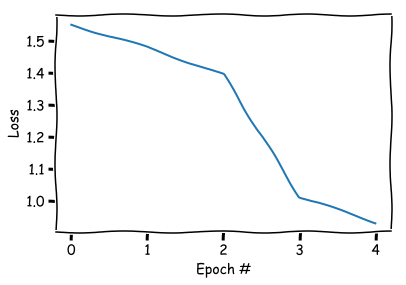

In [38]:
# visualize the loss from the training over the number of epochs
losses_in_epochs = losses[0::2]
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show();